In [6]:
conda install -c conda-forge lifelines

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
surv_analy = pd.read_csv(r'D:\project\Data Set\cancer.csv')

In [9]:
surv_analy.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [10]:
surv_analy.columns

Index(['Unnamed: 0', 'inst', 'time', 'status', 'age', 'sex', 'ph.ecog',
       'ph.karno', 'pat.karno', 'meal.cal', 'wt.loss'],
      dtype='object')

In [11]:
surv_analy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  228 non-null    int64  
 1   inst        227 non-null    float64
 2   time        228 non-null    int64  
 3   status      228 non-null    int64  
 4   age         228 non-null    int64  
 5   sex         228 non-null    int64  
 6   ph.ecog     227 non-null    float64
 7   ph.karno    227 non-null    float64
 8   pat.karno   225 non-null    float64
 9   meal.cal    181 non-null    float64
 10  wt.loss     214 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 19.7 KB


In [12]:
surv_analy.describe()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
count,228.00000,227.000000,228.000000,228.000000,228.000000,228.000000,227.000000,227.000000,225.000000,181.000000,214.000000
mean,114.50000,11.088106,305.232456,1.723684,62.447368,1.394737,0.951542,81.938326,79.955556,928.779006,9.831776
std,65.96211,8.303491,210.645543,0.448159,9.073457,0.489870,0.717872,12.327955,14.623177,402.174707,13.139902
min,1.00000,1.000000,5.000000,1.000000,39.000000,1.000000,0.000000,50.000000,30.000000,96.000000,-24.000000
25%,57.75000,3.000000,166.750000,1.000000,56.000000,1.000000,0.000000,75.000000,70.000000,635.000000,0.000000
50%,114.50000,11.000000,255.500000,2.000000,63.000000,1.000000,1.000000,80.000000,80.000000,975.000000,7.000000
75%,171.25000,16.000000,396.500000,2.000000,69.000000,2.000000,1.000000,90.000000,90.000000,1150.000000,15.750000
max,228.00000,33.000000,1022.000000,2.000000,82.000000,2.000000,3.000000,100.000000,100.000000,2600.000000,68.000000


AxesSubplot(0.125,0.125;0.775x0.755)


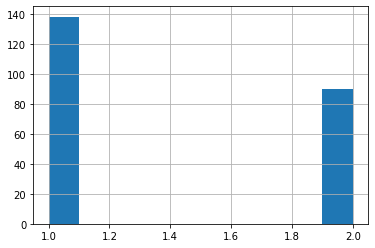

In [13]:
print (surv_analy["sex"].hist())

In [14]:
from lifelines import KaplanMeierFitter

In [15]:
kmf = KaplanMeierFitter()

In [16]:
# Organize our data :

# If status = 1 , then dead = 0
# If status = 2 , then dead = 1

surv_analy.loc[surv_analy.status == 1, 'dead'] = 0
surv_analy.loc[surv_analy.status == 2, 'dead'] = 1

surv_analy.head()


,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1.0
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0,0.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0,1.0


In [17]:
kmf.fit(durations = surv_analy['time'], event_observed = surv_analy['dead'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 228 total observations, 63 right-censored observations>

In [18]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224
13.0,2,2,0,0,223
...,...,...,...,...,...
840.0,1,0,1,0,5
883.0,1,1,0,0,4
965.0,1,0,1,0,3


In [19]:
#calculating survival probablity 
event_at_0 = kmf.event_table.iloc[0,:]

#calculate the survival probability for t=0
surv_for_0 = (event_at_0.at_risk - event_at_0.observed)/event_at_0.at_risk
surv_for_0


1.0

In [20]:
#calculating survival probablity 
event_at_5 = kmf.event_table.iloc[1,:]

#calculate the survival probability for t=5
surv_for_5 = (event_at_5.at_risk - event_at_5.observed)/event_at_5.at_risk
surv_for_5


0.9956140350877193

In [21]:
#calculating survival probablity 
event_at_11 = kmf.event_table.iloc[2,:]

#calculate the survival probability for t=11
surv_for_11 = (event_at_11.at_risk - event_at_11.observed)/event_at_11.at_risk
surv_for_11


0.986784140969163

In [22]:
surv_after_5 = surv_for_0*surv_for_5
surv_after_11=surv_for_0*surv_for_5*surv_for_11
print(surv_after_5)
print(surv_after_11)


0.9956140350877193
0.9824561403508771


In [23]:
print(kmf.predict(12)) #for individual
print(kmf.predict([0,5,11,12,15]))

0.9780701754385963
0     1.000000
5     0.995614
11    0.982456
12    0.978070
15    0.964912
Name: KM_estimate, dtype: float64


In [24]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
5.0,0.995614
11.0,0.982456
12.0,0.978070
13.0,0.969298
...,...
840.0,0.067127
883.0,0.050346
965.0,0.050346


In [25]:
kmf.median_survival_time_

310.0

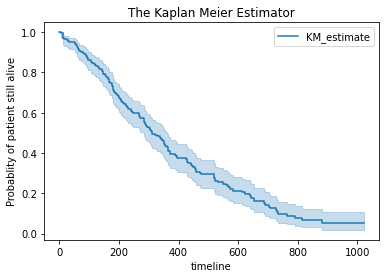

In [26]:
kmf.plot()
plt.title("The Kaplan Meier Estimator")
plt.ylabel("Probablity of patient still alive")
plt.show()

In [27]:
kmf.confidence_interval_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
5.0,0.969277,0.999381
11.0,0.953935,0.993379
12.0,0.948120,0.990813
13.0,0.936682,0.985244
...,...,...
840.0,0.030728,0.123060
883.0,0.017866,0.108662
965.0,0.017866,0.108662
1010.0,0.017866,0.108662


In [28]:
# Probabaility of die :
#p(1022) = p(0) +......+p(1022)

kmf.cumulative_density_

,KM_estimate
timeline,
0.0,0.000000
5.0,0.004386
11.0,0.017544
12.0,0.021930
13.0,0.030702
...,...
840.0,0.932873
883.0,0.949654
965.0,0.949654


<AxesSubplot:xlabel='timeline'>

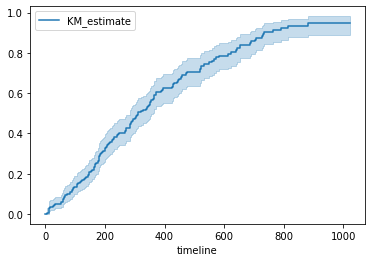

In [29]:
kmf.plot_cumulative_density()

<AxesSubplot:xlabel='log(timeline)', ylabel='log(-log(survival_function_))'>

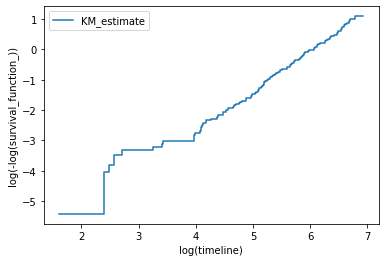

In [30]:
kmf.plot_loglogs()

In [31]:
from lifelines import NelsonAalenFitter

In [32]:
naf = NelsonAalenFitter()
naf.fit(durations = surv_analy['time'], event_observed = surv_analy['dead'])
print(naf.cumulative_hazard_)

          NA_estimate
timeline             
0.0          0.000000
5.0          0.004386
11.0         0.017660
12.0         0.022125
13.0         0.031114
...               ...
840.0        2.641565
883.0        2.891565
965.0        2.891565
1010.0       2.891565
1022.0       2.891565

[187 rows x 1 columns]


<AxesSubplot:xlabel='timeline'>

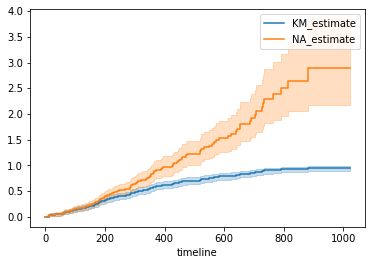

In [33]:
# Plot the cumulative_hazard
kmf.plot_cumulative_density()
naf.plot_cumulative_hazard()

<AxesSubplot:xlabel='timeline'>

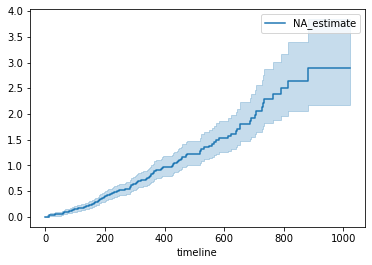

In [34]:
naf.plot()


In [35]:
naf.predict(102)

0.14587349794702753

In [36]:
#now for two  individual group
#kmf_m for male
#kmf_f for female
kmf_m = KaplanMeierFitter()
kmf_f = KaplanMeierFitter()


In [37]:
Male = surv_analy.query('sex==1')
Female = surv_analy.query('sex==2')

In [38]:
kmf_m.fit(durations =  Male["time"],event_observed = Male["dead"] ,label="Male")
kmf_f.fit(durations =  Female["time"],event_observed = Female["dead"] ,label="Female")



<lifelines.KaplanMeierFitter:"Female", fitted with 90 total observations, 37 right-censored observations>

In [39]:
kmf_m.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,138,138
11.0,3,3,0,0,138
12.0,1,1,0,0,135
13.0,2,2,0,0,134
15.0,1,1,0,0,132
...,...,...,...,...,...
814.0,1,1,0,0,5
840.0,1,0,1,0,4
883.0,1,1,0,0,3


In [40]:
kmf_f.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,90,90
5.0,1,1,0,0,90
60.0,1,1,0,0,89
61.0,1,1,0,0,88
62.0,1,1,0,0,87
...,...,...,...,...,...
735.0,1,1,0,0,5
740.0,1,0,1,0,4
765.0,1,1,0,0,3


In [41]:
print(kmf_m.predict(5))
print(kmf_f.predict(5))
print(kmf_m.predict(11))
print(kmf_f.predict(11))

1.0
0.9888888888888887
0.9782608695652172
0.9888888888888887


In [42]:
kmf_m.survival_function_

,Male
timeline,
0.0,1.000000
11.0,0.978261
12.0,0.971014
13.0,0.956522
15.0,0.949275
...,...
814.0,0.053571
840.0,0.053571
883.0,0.035714


In [43]:
kmf_f.survival_function_

,Female
timeline,
0.0,1.000000
5.0,0.988889
60.0,0.977778
61.0,0.966667
62.0,0.955556
...,...
735.0,0.124822
740.0,0.124822
765.0,0.083214


Text(0.5, 1.0, 'KMF')

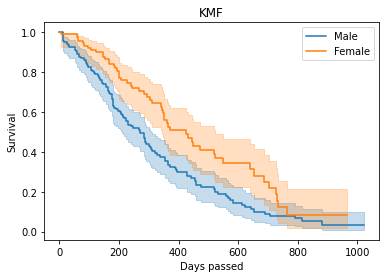

In [44]:
#plotting the graph
kmf_m.plot()
kmf_f.plot()
plt.xlabel("Days passed")
plt.ylabel("Survival")
plt.title("KMF")

In [45]:
kmf_m.cumulative_density_

,Male
timeline,
0.0,0.000000
11.0,0.021739
12.0,0.028986
13.0,0.043478
15.0,0.050725
...,...
814.0,0.946429
840.0,0.946429
883.0,0.964286


In [46]:
kmf_f.cumulative_density_

,Female
timeline,
0.0,0.000000
5.0,0.011111
60.0,0.022222
61.0,0.033333
62.0,0.044444
...,...
735.0,0.875178
740.0,0.875178
765.0,0.916786


<AxesSubplot:xlabel='timeline'>

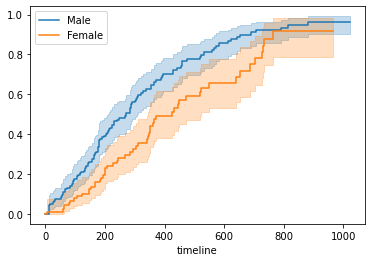

In [47]:
kmf_m.plot_cumulative_density()
kmf_f.plot_cumulative_density()

In [48]:
naf_m = NelsonAalenFitter()
naf_f = NelsonAalenFitter()

naf_m.fit(Male["time"],event_observed = Male["dead"])
naf_f.fit(Female["time"],event_observed = Female["dead"])

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 90 total observations, 37 right-censored observations>

In [49]:
naf_m.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
11.0,0.021899
12.0,0.029306
13.0,0.044287
15.0,0.051863
...,...
814.0,2.831337
840.0,2.831337
883.0,3.164670


In [50]:
naf_f.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
5.0,0.011111
60.0,0.022347
61.0,0.033711
62.0,0.045205
...,...
735.0,1.988977
740.0,1.988977
765.0,2.322310


<AxesSubplot:xlabel='timeline'>

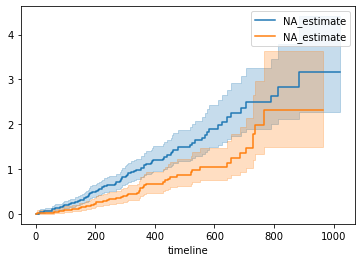

In [51]:
naf_m.plot_cumulative_hazard()
naf_f.plot_cumulative_hazard()

In [52]:
print(naf_m.predict(1022))
print(naf_f.predict(1022))

3.1646698868981966
2.322310160585996


In [53]:
#log rank test

In [54]:
T = Male['time']
D = Male['dead']
T1 = Female['time']
D1 = Female['dead']

In [67]:
from lifelines.statistics import logrank_test

results=logrank_test(T,T1,event_observed_A=D, event_observed_B=D1)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.33 <0.005      9.57

In [66]:
surv_analy= surv_analy.dropna(subset=['inst', 'time', 'status', 'age', 'sex', 'ph.ecog','ph.karno', 'pat.karno', 'meal.cal', 'wt.loss'])

surv_analy.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
5,6,12.0,1022,1,74,1,1.0,50.0,80.0,513.0,0.0,0.0
6,7,7.0,310,2,68,2,2.0,70.0,60.0,384.0,10.0,1.0
7,8,11.0,361,2,71,2,2.0,60.0,80.0,538.0,1.0,1.0


In [59]:
from lifelines import CoxPHFitter

In [60]:
SA_ = surv_analy[[ 'time', 'age', 'sex', 'ph.ecog','ph.karno', 'pat.karno', 'meal.cal', 'wt.loss', 'dead']]

In [61]:
cph = CoxPHFitter()
cph.fit(SA_,"time",event_col="dead")
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 167 total observations, 47 right-censored observations>
             duration col = 'time'
                event col = 'dead'
      baseline estimation = breslow
   number of observations = 167
number of events observed = 120
   partial log-likelihood = -494.03
         time fit was run = 2022-05-21 14:53:05 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
sex        -0.55       0.57       0.20            -0.95            -0.16                 0.39                 0.85
ph.ecog     0.74       2.09       0.22             0.30             1.18                 1.35                 3.26
ph.karno    0.02       1.02       0.01             0.00             0.04                 1.00                 1.05
pat.karno  -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00
meal.cal    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00

            cmp to     z      p   -log2(p)
covariate                                 
age           0.00  0.93   0.35       1.51
sex           0.00 -2.75   0.01       7.37
ph.ecog       0.00  3.29 <0.005       9.95
ph.karno      0.00  2.00   0.05       4.45
pat.karno     0.00 -1.49   0.14       2.87
meal.cal      0.00  0.11   0.91       0.13
wt.loss       0.00 -1.83   0.07       3.89
---
Concordance = 0.65
Partial AIC = 1002.07
log-likelihood ratio test = 28.16 on 7 df
-log2(p) of ll-ratio test = 12.25

<AxesSubplot:>

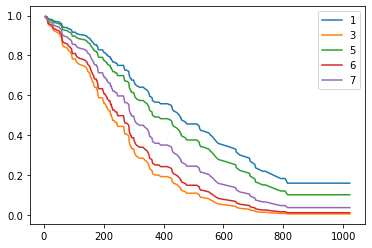

In [62]:
SA_data = SA_.iloc[0:5,:]
cph.predict_survival_function(SA_data).plot()

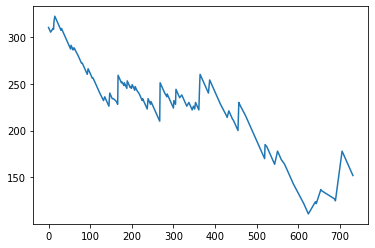

In [63]:
CTE = kmf.conditional_time_to_event_
plt.plot(CTE)

<AxesSubplot:xlabel='log(HR) (95% CI)'>

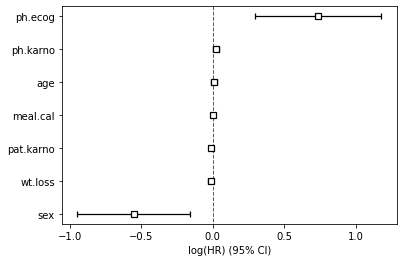

In [64]:
cph.plot()